In [1]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [2]:
#Reading the data into a dataframe
sawdust_train_df = pd.read_excel('https://raw.githubusercontent.com/shreyaschoudhary/Process-Data-Analytics/master/sawdust_train.xlsx')

In [3]:
#Displaying the dataframe
sawdust_train_df

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,w1110,w1111,w1112,w1113,w1114,w1115,w1116,w1117,w1118,w1119,w1120,w1121,w1122,w1123,w1124,w1125,w1126,w1127,w1128,w1129,w1130,w1131,w1132,w1133,w1134,w1135,w1136,w1137,...,w2264,w2265,w2266,w2267,w2268,w2269,w2270,w2271,w2272,w2273,w2274,w2275,w2276,w2277,w2278,w2279,w2280,w2281,w2282,w2283,w2284,w2285,w2286,w2287,w2288,w2289,w2290,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
0,1,02a,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,1.82516,1.82452,1.82407,1.82372,1.82334,1.82283,1.82213,1.82134,1.82036,1.81930,1.81814,1.81696,1.81579,1.81471,1.81368,1.81269,1.81162,1.81055,1.80940,1.80812,1.80669,1.80520,1.80365,1.80204,1.80033,1.79850,1.79654,1.79447,1.79224,1.78987,...,0.474785,0.475201,0.475893,0.477067,0.478534,0.480241,0.482001,0.483780,0.485739,0.488090,0.490816,0.493888,0.496992,0.500208,0.503312,0.506305,0.509129,0.511941,0.514845,0.518192,0.521982,0.526057,0.530565,0.535400,0.540498,0.545399,0.550011,0.554586,0.559044,0.563587,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025,0.00,100.00,0.00
1,2,02b,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,1.82135,1.82070,1.82019,1.81970,1.81914,1.81827,1.81732,1.81630,1.81521,1.81415,1.81310,1.81212,1.81122,1.81030,1.80937,1.80840,1.80737,1.80635,1.80527,1.80412,1.80288,1.80141,1.79986,1.79817,1.79645,1.79467,1.79280,1.79087,1.78882,1.78641,...,0.473774,0.474213,0.474748,0.475621,0.476784,0.478267,0.479963,0.481736,0.483618,0.485618,0.487620,0.489659,0.491748,0.494232,0.497150,0.500430,0.503719,0.507047,0.510351,0.513900,0.517821,0.521983,0.526621,0.531626,0.536929,0.542099,0.547000,0.551910,0.556829,0.561744,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470,0.00,100.00,0.00
2,5,15a,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,1.83834,1.83773,1.83732,1.83694,1.83661,1.83620,1.83573,1.83525,1.83471,1.83405,1.83323,1.83232,1.83131,1.83032,1.82927,1.82825,1.82717,1.82610,1.82499,1.82369,1.82216,1.82053,1.81872,1.81676,1.81466,1.81245,1.81011,1.80754,1.80482,1.80191,...,0.455464,0.456610,0.458070,0.459900,0.461908,0.463893,0.465765,0.467519,0.469300,0.471321,0.473713,0.476485,0.479494,0.482882,0.486578,0.490449,0.494293,0.498253,0.502440,0.507076,0.511987,0.516789,0.521732,0.526741,0.531986,0.537183,0.542190,0.547198,0.552090,0.557003,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419,33.33,33.33,33.33
3,6,15b,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,1.83714,1.83658,1.83626,1.83604,1.83578,1.83540,1.83483,1.83414,1.83330,1.83237,1.83140,1.83043,1.82947,1.82862,1.82778,1.82696,1.82604,1.82503,1.82387,1.82256,1.82106,1.81939,1.81758,1.81561,1.81348,1.81119,1.80868,1.80613,1.80346,1.80061,...,0.457400,0.458493,0.459469,0.460552,0.461734,0.463181,0.464938,0.467002,0.469513,0.472629,0.476135,0.479899,0.483502,0.487067,0.490531,0.493908,0.497135,0.500304,0.503643,0.507464,0.511839,0.516445,0.521344,0.526491,0.531965,0.537382,0.542657,0.547984,0.553266,0.558515,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277,33.33,33.33,33.33
4,9,08a,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,1.82862,1.82806,1.82763,1.82737,1.82717,1.82687,1.82642,1.82587,1.82494,1.82408,1.82305,1.82212,1.82127,1.82055,1.81980,1.81893,1.81788,1.81673,1.81544,1.81401,1.81239,1.81066,1.80881,1.80688,1.80485,1.80271,1.80040,1.79803,1.79550,1.79274,...,0.462067,0.463242,0.464214,0.465313,0.466533,0.468011,0.469663,0.471438,0.473307,0.475482,0.477810,0.480296,0.482859,0.485773,0.489045,0.492685,0.496446,0.500356,0.504411,0.508874,0.513722,0.518468,0.523306,0.528185,0.533257,0.538120,0.542820,0.547705,0.552726,0.557880,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635,0.00,66.65,33.35
5,10,08b,1.83173,1.83134,1.83083,1.83005,1.82899,1.82769,1.82638,1.82527,1.82435,1.82359,1.82300,1.82252,1.82214,1.82184,1.82133,1.82081,1.82023,1.81959,1.81889,1.81812,1.81732,

In [4]:
#Checking the dataframe for NaN values
sawdust_train_df.isnull().any().sum()

0

#Task #1: Unsupervised learning, PCA of NIR Data

#PCA

#A

In [5]:
#Filtering out the spectra columns from the original dataframe
sawdust_spectra = sawdust_train_df.iloc[:,2:1203]
sawdust_spectra

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,w1110,w1111,w1112,w1113,w1114,w1115,w1116,w1117,w1118,w1119,w1120,w1121,w1122,w1123,w1124,w1125,w1126,w1127,w1128,w1129,w1130,w1131,w1132,w1133,w1134,w1135,w1136,w1137,w1138,w1139,...,w2261,w2262,w2263,w2264,w2265,w2266,w2267,w2268,w2269,w2270,w2271,w2272,w2273,w2274,w2275,w2276,w2277,w2278,w2279,w2280,w2281,w2282,w2283,w2284,w2285,w2286,w2287,w2288,w2289,w2290,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300
0,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,1.82516,1.82452,1.82407,1.82372,1.82334,1.82283,1.82213,1.82134,1.82036,1.81930,1.81814,1.81696,1.81579,1.81471,1.81368,1.81269,1.81162,1.81055,1.80940,1.80812,1.80669,1.80520,1.80365,1.80204,1.80033,1.79850,1.79654,1.79447,1.79224,1.78987,1.78740,1.78485,...,0.474932,0.474789,0.474615,0.474785,0.475201,0.475893,0.477067,0.478534,0.480241,0.482001,0.483780,0.485739,0.488090,0.490816,0.493888,0.496992,0.500208,0.503312,0.506305,0.509129,0.511941,0.514845,0.518192,0.521982,0.526057,0.530565,0.535400,0.540498,0.545399,0.550011,0.554586,0.559044,0.563587,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025
1,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,1.82135,1.82070,1.82019,1.81970,1.81914,1.81827,1.81732,1.81630,1.81521,1.81415,1.81310,1.81212,1.81122,1.81030,1.80937,1.80840,1.80737,1.80635,1.80527,1.80412,1.80288,1.80141,1.79986,1.79817,1.79645,1.79467,1.79280,1.79087,1.78882,1.78641,1.78374,1.78083,...,0.473174,0.473332,0.473448,0.473774,0.474213,0.474748,0.475621,0.476784,0.478267,0.479963,0.481736,0.483618,0.485618,0.487620,0.489659,0.491748,0.494232,0.497150,0.500430,0.503719,0.507047,0.510351,0.513900,0.517821,0.521983,0.526621,0.531626,0.536929,0.542099,0.547000,0.551910,0.556829,0.561744,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470
2,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,1.83834,1.83773,1.83732,1.83694,1.83661,1.83620,1.83573,1.83525,1.83471,1.83405,1.83323,1.83232,1.83131,1.83032,1.82927,1.82825,1.82717,1.82610,1.82499,1.82369,1.82216,1.82053,1.81872,1.81676,1.81466,1.81245,1.81011,1.80754,1.80482,1.80191,1.79884,1.79565,...,0.454709,0.454542,0.454687,0.455464,0.456610,0.458070,0.459900,0.461908,0.463893,0.465765,0.467519,0.469300,0.471321,0.473713,0.476485,0.479494,0.482882,0.486578,0.490449,0.494293,0.498253,0.502440,0.507076,0.511987,0.516789,0.521732,0.526741,0.531986,0.537183,0.542190,0.547198,0.552090,0.557003,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419
3,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,1.83714,1.83658,1.83626,1.83604,1.83578,1.83540,1.83483,1.83414,1.83330,1.83237,1.83140,1.83043,1.82947,1.82862,1.82778,1.82696,1.82604,1.82503,1.82387,1.82256,1.82106,1.81939,1.81758,1.81561,1.81348,1.81119,1.80868,1.80613,1.80346,1.80061,1.79760,1.79438,...,0.454963,0.455568,0.456332,0.457400,0.458493,0.459469,0.460552,0.461734,0.463181,0.464938,0.467002,0.469513,0.472629,0.476135,0.479899,0.483502,0.487067,0.490531,0.493908,0.497135,0.500304,0.503643,0.507464,0.511839,0.516445,0.521344,0.526491,0.531965,0.537382,0.542657,0.547984,0.553266,0.558515,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277
4,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,1.82862,1.82806,1.82763,1.82737,1.82717,1.82687,1.82642,1.82587,1.82494,1.82408,1.82305,1.82212,1.82127,1.82055,1.81980,1.81893,1.81788,1.81673,1.81544,1.81401,1.81239,1.81066,1.80881,1.80688,1.80485,1.80271,1.80040,1.79803,1.79550,1.79274,1.78980,1.78666,...,0.459476,0.460041,0.460878,0.462067,0.463242,0.464214,0.465313,0.466533,0.468011,0.469663,0.471438,0.473307,0.475482,0.477810,0.480296,0.482859,0.485773,0.489045,0.492685,0.496446,0.500356,0.504411,0.508874,0.513722,0.518468,0.523306,0.528185,0.533257,0.538120,0.542820,0.547705,0.552726,0.557880,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635
5,1.83173,1.83134,1.83083,1.83005,1.82899,1.82769,1.82638,1.82527,1.82435,1.82359,1.8

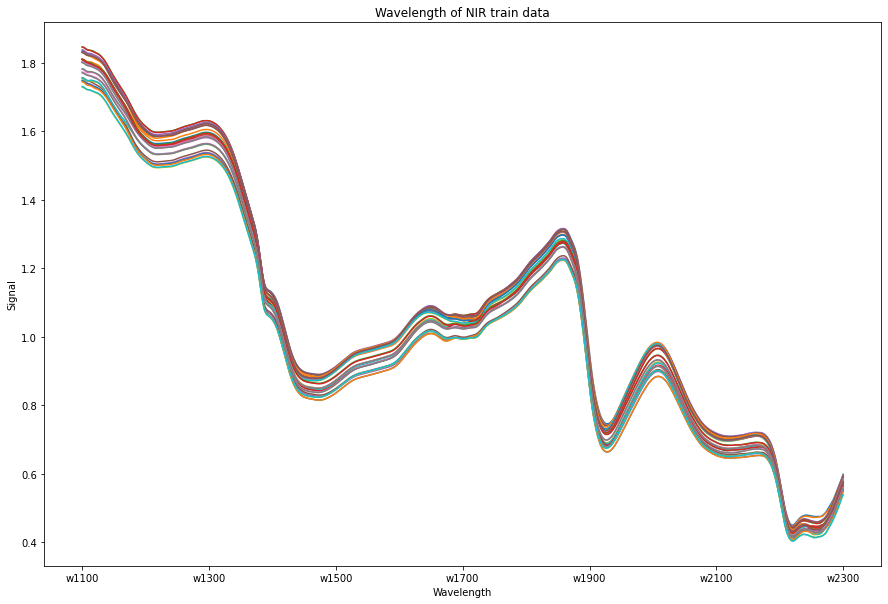

In [6]:
#Raw spectrum plot of the dataframe formed above
sawdust_spectra.transpose().plot(legend=None,
                              figsize=(15,10),
                              title='Wavelength of NIR train data',
                              xlabel='Wavelength',
                              ylabel='Signal')
plt.savefig('Fig_1_A_Choudhary_Shreyas.png')

In [7]:
#Checking the stats of the dataframe
sawdust_train_df.describe()

,Primary ID,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,w1110,w1111,w1112,w1113,w1114,w1115,w1116,w1117,w1118,w1119,w1120,w1121,w1122,w1123,w1124,w1125,w1126,w1127,w1128,w1129,w1130,w1131,w1132,w1133,w1134,w1135,w1136,w1137,w1138,...,w2264,w2265,w2266,w2267,w2268,w2269,w2270,w2271,w2272,w2273,w2274,w2275,w2276,w2277,w2278,w2279,w2280,w2281,w2282,w2283,w2284,w2285,w2286,w2287,w2288,w2289,w2290,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,25.766667,1.793867,1.793442,1.792756,1.791714,1.790355,1.788825,1.787430,1.786354,1.785624,1.785098,1.784758,1.784462,1.784192,1.783749,1.783146,1.782495,1.781764,1.780974,1.780105,1.779195,1.778306,1.777520,1.776704,1.775855,1.774832,1.773782,1.772619,1.771310,1.769813,1.768222,1.766474,1.764636,1.762627,1.760455,1.758086,1.755650,1.753086,1.750330,1.747424,...,0.441334,0.442278,0.443176,0.444355,0.445725,0.447332,0.449159,0.450972,0.452951,0.455409,0.458138,0.461070,0.463899,0.466967,0.470364,0.473921,0.477534,0.481211,0.484903,0.489050,0.493526,0.497793,0.502212,0.506771,0.511848,0.516786,0.521491,0.526350,0.531285,0.536347,0.541439,0.546291,0.551039,0.556038,0.561003,0.565802,0.570125,33.332000,33.332000,33.332000
std,15.027982,0.035735,0.035745,0.035729,0.035712,0.035719,0.035727,0.035714,0.035684,0.035633,0.035610,0.035571,0.035534,0.035490,0.035506,0.035543,0.035567,0.035560,0.035570,0.035566,0.035552,0.035508,0.035428,0.035333,0.035241,0.035198,0.035150,0.035115,0.035087,0.035071,0.035044,0.035017,0.034974,0.034965,0.034973,0.035000,0.034991,0.034950,0.034903,0.034843,...,0.014678,0.014619,0.014609,0.014590,0.014583,0.014580,0.014563,0.014607,0.014654,0.014593,0.014507,0.014431,0.014453,0.014498,0.014504,0.014541,0.014589,0.014651,0.014772,0.014828,0.014890,0.015096,0.015342,0.015615,0.015752,0.015926,0.016133,0.016280,0.016366,0.016390,0.016364,0.016374,0.016398,0.016352,0.016340,0.016403,0.016587,29.683646,29.683646,29.683646
min,1.000000,1.728540,1.727880,1.727220,1.726410,1.725390,1.724080,1.723010,1.722130,1.721470,1.720870,1.720510,1.720230,1.720000,1.719290,1.718480,1.717690,1.716950,1.716090,1.715100,1.714060,1.713190,1.712500,1.711860,1.711150,1.710160,1.709160,1.708030,1.706750,1.705250,1.703650,1.701980,1.700270,1.698390,1.696230,1.693790,1.691370,1.688860,1.686070,1.683050,...,0.416419,0.417041,0.417411,0.418210,0.419187,0.420417,0.421900,0.423263,0.424927,0.427455,0.430402,0.433654,0.436691,0.439921,0.443427,0.446803,0.449982,0.453212,0.456279,0.460088,0.464356,0.468282,0.472431,0.476675,0.481459,0.485812,0.489918,0.494376,0.499298,0.504211,0.509282,0.514225,0.519246,0.524742,0.530065,0.534544,0.538251,0.000000,0.000000,0.000000
25%,13.250000,1.759238,1.758925,1.758375,1.757460,1.756217,1.754810,1.753487,1.752448,1.751605,1.751157,1.751320,1.751558,1.751832,1.751828,1.751545,1.751202,1.750793,1.750277,1.749698,1.749032,1.748370,1.747770,1.747120,1.746385,1.745425,1.744380,1.743217,1.741840,1.740233,1.738478,1.736545,1.734468,1.732168,1.729618,1.726885,1.724083,1.721172,1.718068,1.714857,...,0.430383,0.431422,0.432532,0.433909,0.435339,0.436813,0.438331,0.439682,0.441627,0.444548,0.447887,0.450863,0.453343,0.456594,0.460306,0.4

#B

In [8]:
#Defining standard scaling (Pre-processing)
scaler = StandardScaler(with_std=False)
scaler

StandardScaler(copy=True, with_mean=True, with_std=False)

In [9]:
#Fit transforming the dataframe for standard scaling
sawdust_spectra_scaled = scaler.fit_transform(sawdust_spectra)

In [10]:
#Defining the PCA 
pca = PCA(n_components=5, svd_solver='full')

In [11]:
#Fit transforming the PCA on the dataframe
pca_scores_train = pca.fit_transform(sawdust_spectra_scaled)

#D&E

In [12]:
#Forming the dataframe for PCA scores
train_scores_pd = pd.DataFrame(data = pca_scores_train
                         ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
                         ,index = sawdust_spectra.index)
train_scores_pd

,PC1,PC2,PC3,PC4,PC5
0,-1.078295,-0.047001,0.251280,0.024857,0.003036
1,-0.929153,-0.060230,0.245587,0.000213,-0.003432
2,-1.022756,-0.305001,-0.042607,0.020161,-0.021894
3,-1.019964,-0.295982,-0.037858,0.021896,-0.026418
4,-1.184856,-0.018965,0.083824,-0.021246,-0.009141
5,-1.095564,0.004305,0.085434,-0.023682,-0.008591
6,-0.429080,0.383454,-0.016684,0.107723,-0.004963
7,-0.482592,0.379079,-0.008178,0.101704,-0.004043
8,0.070632,-0.290886,-0.044821,0.048580,-0.003262
9,0.198855,-0.264795,-0.043709,0.049472,-0.002781


In [13]:
#Forming the dataframe for PCA loadings
train_loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
                           ,index = sawdust_spectra.columns)
train_loadings_pd

,PC1,PC2,PC3,PC4,PC5
w1100,-0.034221,-0.065116,0.005665,-0.036834,0.034033
w1101,-0.034276,-0.064894,0.005843,-0.036801,0.029723
w1102,-0.034303,-0.064643,0.005948,-0.037266,0.025164
w1103,-0.034311,-0.064478,0.006022,-0.037800,0.022163
w1104,-0.034327,-0.064430,0.005969,-0.038608,0.021055
...,...,...,...,...,...
w2296,-0.017195,-0.007921,0.029052,0.075289,-0.059924
w2297,-0.017148,-0.007882,0.028378,0.076721,-0.057624
w2298,-0.017126,-0.007856,0.028030,0.078477,-0.056627
w2299,-0.017170,-0.007917,0.027927,0.080656,-0.059458


In [14]:
#Defining function for plotting the pca scores
def score_plot(scores, score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    fig = plt.figure(figsize=(9, 9))
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
        plt.text(x, y, label, ha='center', size=11)
        
    plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

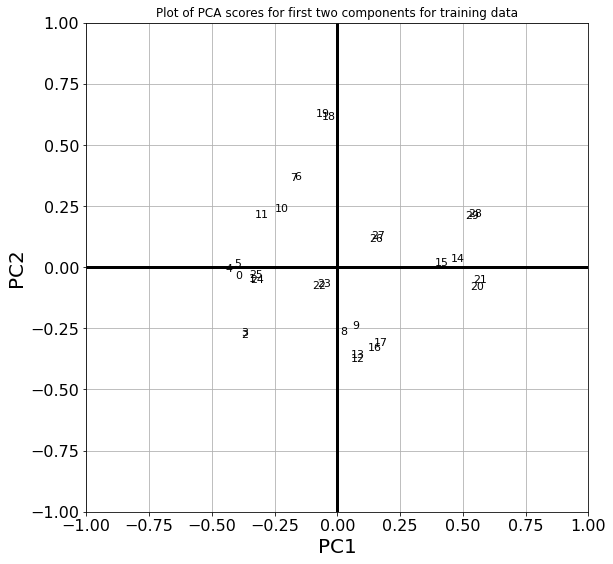

In [15]:
#Plotting the scores for first two PCA components
score_plot(pca_scores_train[:,:2], score_labels=train_scores_pd.index)
plt.title('Plot of PCA scores for first two components for training data')
plt.savefig('Fig_1_B_Choudhary_Shreyas.png')

Comment on any outliers, trends, clusters etc (if any).

- The plot shows the scores of first two pca components. The points are seen to be mostly present in pairs. Points indexed 18,19 can be thought of as outlier as it is present fairly at a distance that is greater than other points. Hence they will be removed further before implementation of Partial Least squares in the following section.

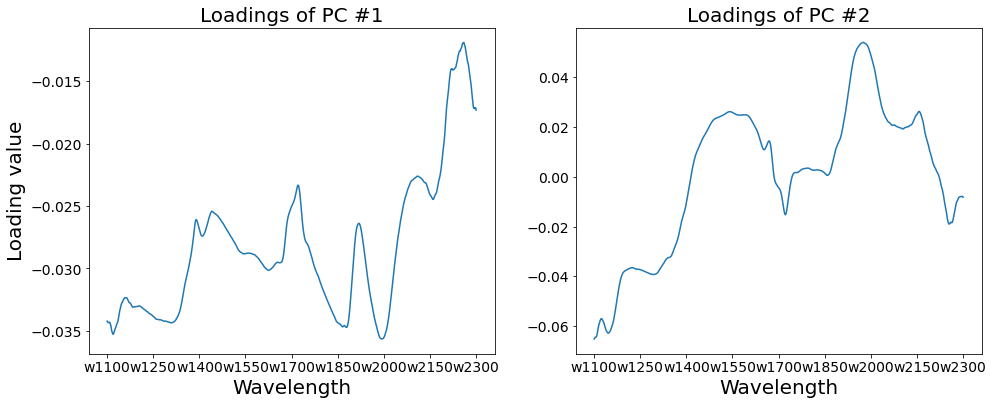

In [16]:
#Plotting the loadings for first two PCA components
fig0 = plt.figure(figsize=(16, 6))
sub1 = fig0.add_subplot(121)
plt.plot(train_loadings_pd['PC1'],'-')
sub1.set_xlabel('Wavelength', fontsize=20)
sub1.set_ylabel('Loading value', fontsize=20)
sub1.set_title('Loadings of PC #1', fontsize=20)
sub1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

sub2 = fig0.add_subplot(122)
plt.plot(train_loadings_pd['PC2'],'-')
sub2.set_xlabel('Wavelength', fontsize=20)
sub2.set_title('Loadings of PC #2', fontsize=20)
sub2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)
plt.savefig('Fig_1_C_Choudhary_Shreyas.png')

Comment on any outliers, trends, clusters etc (if any).

- As such there are no significant trends visible clearly from the plots of the loading for first 2 pca components. The plots are seen to fluctuate in a non-orderly manner hence nothing can be infered accordingly.

In [17]:
#PCA explained variance
pca.explained_variance_

array([7.98373089e-01, 7.94695707e-02, 1.01262970e-02, 2.96991702e-03,
       2.00732349e-04])

In [18]:
#PCA explained variance ratio
pca.explained_variance_ratio_*100

array([8.95578453e+01, 8.91453334e+00, 1.13592173e+00, 3.33151722e-01,
       2.25172377e-02])

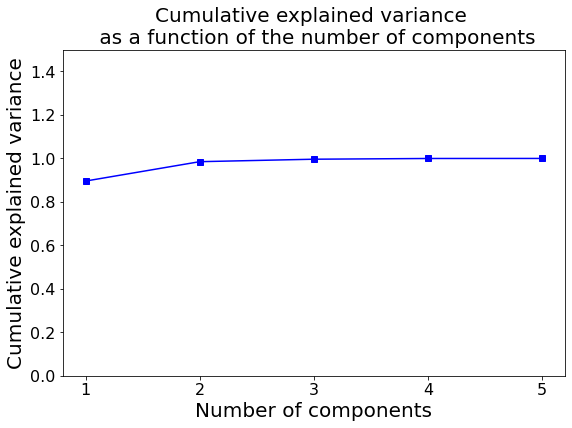

In [19]:
#Plotting cumulative explained variance as a function of the number of components
fig = plt.figure(figsize=(9, 6))
sub0 = fig.add_subplot(111)
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'b-s')
sub0.set_xlabel('Number of components', fontsize=20)
sub0.set_ylabel('Cumulative explained variance', fontsize=20)
sub0.set_title('Cumulative explained variance \n as a function of the number of components', fontsize=20)
sub0.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=16)
plt.ylim(0,1.5)
plt.savefig('Fig_1_D_Choudhary_Shreyas.png')

How many components do we need to capture 99% of the variance?

- From the figure above, 2 components are enough to capture 99% of the variance.

#F

In [20]:
#Reading the data into a dataframe
sawdust_pred_df = pd.read_excel('https://raw.githubusercontent.com/shreyaschoudhary/Process-Data-Analytics/master/sawdust_pred.xlsx')

In [21]:
#Displaying the dataframe
sawdust_pred_df

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,w1110,w1111,w1112,w1113,w1114,w1115,w1116,w1117,w1118,w1119,w1120,w1121,w1122,w1123,w1124,w1125,w1126,w1127,w1128,w1129,w1130,w1131,w1132,w1133,w1134,w1135,w1136,w1137,...,w2264,w2265,w2266,w2267,w2268,w2269,w2270,w2271,w2272,w2273,w2274,w2275,w2276,w2277,w2278,w2279,w2280,w2281,w2282,w2283,w2284,w2285,w2286,w2287,w2288,w2289,w2290,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
0,3,27a,1.81358,1.81322,1.81260,1.81163,1.81039,1.80906,1.80790,1.80710,1.80665,1.80652,1.80662,1.80681,1.80697,1.80693,1.80669,1.80629,1.80563,1.80492,1.80410,1.80330,1.80250,1.80170,1.80084,1.79986,1.79869,1.79742,1.79598,1.79421,1.79222,1.79007,1.78779,1.78541,1.78296,1.78047,1.77786,1.77500,1.77197,1.76873,...,0.441450,0.442973,0.444594,0.446488,0.448491,0.450568,0.452553,0.454386,0.456326,0.458741,0.461666,0.465178,0.469017,0.473237,0.477520,0.481731,0.485742,0.489721,0.493781,0.498275,0.503130,0.508033,0.513017,0.518112,0.523386,0.528530,0.533506,0.538656,0.543831,0.549036,0.554158,0.559145,0.564020,0.569030,0.574032,0.578976,0.583663,10,10,80
1,4,27b,1.81596,1.81561,1.81501,1.81407,1.81282,1.81141,1.81011,1.80915,1.80864,1.80852,1.80868,1.80893,1.80922,1.80912,1.80875,1.80825,1.80760,1.80695,1.80628,1.80564,1.80501,1.80418,1.80332,1.80221,1.80090,1.79954,1.79810,1.79658,1.79490,1.79309,1.79112,1.78883,1.78637,1.78372,1.78086,1.77791,1.77480,1.77152,...,0.441587,0.442904,0.444219,0.445647,0.447135,0.448842,0.450809,0.453084,0.455733,0.458814,0.462180,0.465654,0.469008,0.472488,0.476237,0.480374,0.484904,0.489770,0.494809,0.500075,0.505326,0.510305,0.515156,0.519978,0.525036,0.529990,0.534792,0.539687,0.544487,0.549293,0.553986,0.558641,0.563356,0.568291,0.573301,0.578249,0.582786,10,10,80
2,7,25a,1.78716,1.78692,1.78634,1.78540,1.78391,1.78218,1.78059,1.77917,1.77823,1.77766,1.77740,1.77726,1.77695,1.77654,1.77590,1.77499,1.77400,1.77297,1.77194,1.77092,1.77000,1.76926,1.76855,1.76785,1.76699,1.76604,1.76487,1.76353,1.76203,1.76041,1.75871,1.75697,1.75517,1.75326,1.75119,1.74900,1.74657,1.74393,...,0.448265,0.449104,0.449923,0.450928,0.452090,0.453532,0.455205,0.457012,0.459003,0.461421,0.464125,0.467076,0.470049,0.473223,0.476549,0.480012,0.483498,0.487076,0.490776,0.494946,0.499580,0.504355,0.509354,0.514593,0.520145,0.525624,0.530797,0.535891,0.540838,0.545726,0.550425,0.554899,0.559244,0.563942,0.568828,0.573971,0.579059,80,10,10
3,8,25b,1.78042,1.77997,1.77926,1.77823,1.77693,1.77544,1.77406,1.77293,1.77212,1.77133,1.77072,1.77021,1.76978,1.76927,1.76868,1.76804,1.76730,1.76630,1.76526,1.76416,1.76309,1.76213,1.76121,1.76036,1.75954,1.75876,1.75787,1.75681,1.75546,1.75386,1.75205,1.75009,1.74806,1.74595,1.74373,1.74145,1.73904,1.73647,...,0.447329,0.448437,0.449560,0.450935,0.452469,0.454119,0.455776,0.457288,0.458684,0.460283,0.462095,0.464333,0.466935,0.470146,0.473897,0.477947,0.482013,0.486042,0.489911,0.493947,0.498102,0.502223,0.506492,0.510929,0.515726,0.520578,0.525330,0.530337,0.535487,0.540901,0.546347,0.551737,0.556951,0.562219,0.567279,0.572146,0.576698,80,10,10
4,13,17a,1.77133,1.77099,1.77031,1.76935,1.76811,1.76680,1.76563,1.76467,1.76401,1.76346,1.76300,1.76254,1.76198,1.76122,1.76027,1.75924,1.75822,1.75701,1.75583,1.75468,1.75374,1.75287,1.75210,1.75136,1.75054,1.74950,1.74833,1.74698,1.74549,1.74377,1.74202,1.74017,1.73823,1.73615,1.73392,1.73164,1.72924,1.72660,...,0.434951,0.435561,0.436016,0.436719,0.437679,0.438976,0.440772,0.442755,0.444955,0.447483,0.450069,0.452752,0.455347,0.458230,0.461507,0.465032,0.468595,0.472201,0.475707,0.479589,0.483791,0.487946,0.492442,0.497222,0.502528,0.507682,0.512486,0.517237,0.521950,0.526659,0.531376,0.535909,0.540315,0.544800,0.549163,0.553316,0.557163,25,50,25
5,14,17b,1.76519,1.76477,1.76401,1.76292,1.76143,1.75980,1.75824,1.75704,1.75625,1.75572,1.75540,1.75512,1.75473,1.75412,1.75322,1.75220,1.75115,1.75013,1.74920,1.74838,1.74767,1.74707,1.74640,1.74557,1.74447,1.74320,1

In [22]:
#Filtering out the spectra columns from the original dataframe
sawdust_spectra_pred = sawdust_pred_df.iloc[:,2:1203]
sawdust_spectra_pred

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,w1110,w1111,w1112,w1113,w1114,w1115,w1116,w1117,w1118,w1119,w1120,w1121,w1122,w1123,w1124,w1125,w1126,w1127,w1128,w1129,w1130,w1131,w1132,w1133,w1134,w1135,w1136,w1137,w1138,w1139,...,w2261,w2262,w2263,w2264,w2265,w2266,w2267,w2268,w2269,w2270,w2271,w2272,w2273,w2274,w2275,w2276,w2277,w2278,w2279,w2280,w2281,w2282,w2283,w2284,w2285,w2286,w2287,w2288,w2289,w2290,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300
0,1.81358,1.81322,1.81260,1.81163,1.81039,1.80906,1.80790,1.80710,1.80665,1.80652,1.80662,1.80681,1.80697,1.80693,1.80669,1.80629,1.80563,1.80492,1.80410,1.80330,1.80250,1.80170,1.80084,1.79986,1.79869,1.79742,1.79598,1.79421,1.79222,1.79007,1.78779,1.78541,1.78296,1.78047,1.77786,1.77500,1.77197,1.76873,1.76530,1.76175,...,0.438461,0.439190,0.440101,0.441450,0.442973,0.444594,0.446488,0.448491,0.450568,0.452553,0.454386,0.456326,0.458741,0.461666,0.465178,0.469017,0.473237,0.477520,0.481731,0.485742,0.489721,0.493781,0.498275,0.503130,0.508033,0.513017,0.518112,0.523386,0.528530,0.533506,0.538656,0.543831,0.549036,0.554158,0.559145,0.564020,0.569030,0.574032,0.578976,0.583663
1,1.81596,1.81561,1.81501,1.81407,1.81282,1.81141,1.81011,1.80915,1.80864,1.80852,1.80868,1.80893,1.80922,1.80912,1.80875,1.80825,1.80760,1.80695,1.80628,1.80564,1.80501,1.80418,1.80332,1.80221,1.80090,1.79954,1.79810,1.79658,1.79490,1.79309,1.79112,1.78883,1.78637,1.78372,1.78086,1.77791,1.77480,1.77152,1.76811,1.76454,...,0.438997,0.439561,0.440381,0.441587,0.442904,0.444219,0.445647,0.447135,0.448842,0.450809,0.453084,0.455733,0.458814,0.462180,0.465654,0.469008,0.472488,0.476237,0.480374,0.484904,0.489770,0.494809,0.500075,0.505326,0.510305,0.515156,0.519978,0.525036,0.529990,0.534792,0.539687,0.544487,0.549293,0.553986,0.558641,0.563356,0.568291,0.573301,0.578249,0.582786
2,1.78716,1.78692,1.78634,1.78540,1.78391,1.78218,1.78059,1.77917,1.77823,1.77766,1.77740,1.77726,1.77695,1.77654,1.77590,1.77499,1.77400,1.77297,1.77194,1.77092,1.77000,1.76926,1.76855,1.76785,1.76699,1.76604,1.76487,1.76353,1.76203,1.76041,1.75871,1.75697,1.75517,1.75326,1.75119,1.74900,1.74657,1.74393,1.74112,1.73812,...,0.446429,0.446895,0.447437,0.448265,0.449104,0.449923,0.450928,0.452090,0.453532,0.455205,0.457012,0.459003,0.461421,0.464125,0.467076,0.470049,0.473223,0.476549,0.480012,0.483498,0.487076,0.490776,0.494946,0.499580,0.504355,0.509354,0.514593,0.520145,0.525624,0.530797,0.535891,0.540838,0.545726,0.550425,0.554899,0.559244,0.563942,0.568828,0.573971,0.579059
3,1.78042,1.77997,1.77926,1.77823,1.77693,1.77544,1.77406,1.77293,1.77212,1.77133,1.77072,1.77021,1.76978,1.76927,1.76868,1.76804,1.76730,1.76630,1.76526,1.76416,1.76309,1.76213,1.76121,1.76036,1.75954,1.75876,1.75787,1.75681,1.75546,1.75386,1.75205,1.75009,1.74806,1.74595,1.74373,1.74145,1.73904,1.73647,1.73376,1.73090,...,0.445158,0.445660,0.446328,0.447329,0.448437,0.449560,0.450935,0.452469,0.454119,0.455776,0.457288,0.458684,0.460283,0.462095,0.464333,0.466935,0.470146,0.473897,0.477947,0.482013,0.486042,0.489911,0.493947,0.498102,0.502223,0.506492,0.510929,0.515726,0.520578,0.525330,0.530337,0.535487,0.540901,0.546347,0.551737,0.556951,0.562219,0.567279,0.572146,0.576698
4,1.77133,1.77099,1.77031,1.76935,1.76811,1.76680,1.76563,1.76467,1.76401,1.76346,1.76300,1.76254,1.76198,1.76122,1.76027,1.75924,1.75822,1.75701,1.75583,1.75468,1.75374,1.75287,1.75210,1.75136,1.75054,1.74950,1.74833,1.74698,1.74549,1.74377,1.74202,1.74017,1.73823,1.73615,1.73392,1.73164,1.72924,1.72660,1.72375,1.72061,...,0.433597,0.433874,0.434238,0.434951,0.435561,0.436016,0.436719,0.437679,0.438976,0.440772,0.442755,0.444955,0.447483,0.450069,0.452752,0.455347,0.458230,0.461507,0.465032,0.468595,0.472201,0.475707,0.479589,0.483791,0.487946,0.492442,0.497222,0.502528,0.507682,0.512486,0.517237,0.521950,0.526659,0.531376,0.535909,0.540315,0.544800,0.549163,0.553316,0.557163
5,1.76519,1.76477,1.76401,1.76292,1.76143,1.75980,1.75824,1.75704,1.75625,1.75572,1.7

In [23]:
#Fit transforming the dataframe for standard scaling
sawdust_spectra_pred_scaled = scaler.fit_transform(sawdust_spectra_pred)

In [24]:
#Fit transforming the PCA on the dataframe
pca_scores_pred = pca.fit_transform(sawdust_spectra_pred_scaled)

In [25]:
#Forming the dataframe for PCA scores
pred_scores_pd = pd.DataFrame(data = pca_scores_pred
                         ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
                         ,index = sawdust_spectra_pred.index)
pred_scores_pd

,PC1,PC2,PC3,PC4,PC5
0,1.307167,-0.116739,0.019663,-0.011489,0.042792
1,1.295767,-0.082817,0.045996,-0.019569,0.049907
2,0.045929,0.312981,-0.075174,-0.024855,0.019280
3,-0.100166,0.282512,-0.080612,-0.021303,0.026089
4,-0.238445,0.106215,0.067848,-0.000860,0.029368
5,-0.347892,0.062116,0.054608,0.004865,0.034243
6,0.777212,0.081381,-0.034592,-0.012591,-0.022065
7,0.846563,0.051527,-0.048657,-0.006842,-0.026525
8,-0.059730,0.124504,0.088213,0.051086,-0.013622
9,0.083478,0.128492,0.098061,0.059624,-0.018701


#G

In [26]:
#Merging the dataframes and values of PC1 and PC2 scores for both train and pred dataframes
a1 = pd.DataFrame(pca_scores_pred[:,:2])
a1['y'] = 'pred'       #Adding labels for graphical distinction of points
a2 = pd.DataFrame(pca_scores_train[:,:2])
a2['y'] = 'train'      #Adding labels for graphical distinction of points
a3 = a1.append(a2, ignore_index=True)
a3.columns=['PC1', 'PC2', 'y']
a3

,PC1,PC2,y
0,1.307167,-0.116739,pred
1,1.295767,-0.082817,pred
2,0.045929,0.312981,pred
3,-0.100166,0.282512,pred
4,-0.238445,0.106215,pred
5,-0.347892,0.062116,pred
6,0.777212,0.081381,pred
7,0.846563,0.051527,pred
8,-0.059730,0.124504,pred
9,0.083478,0.128492,pred


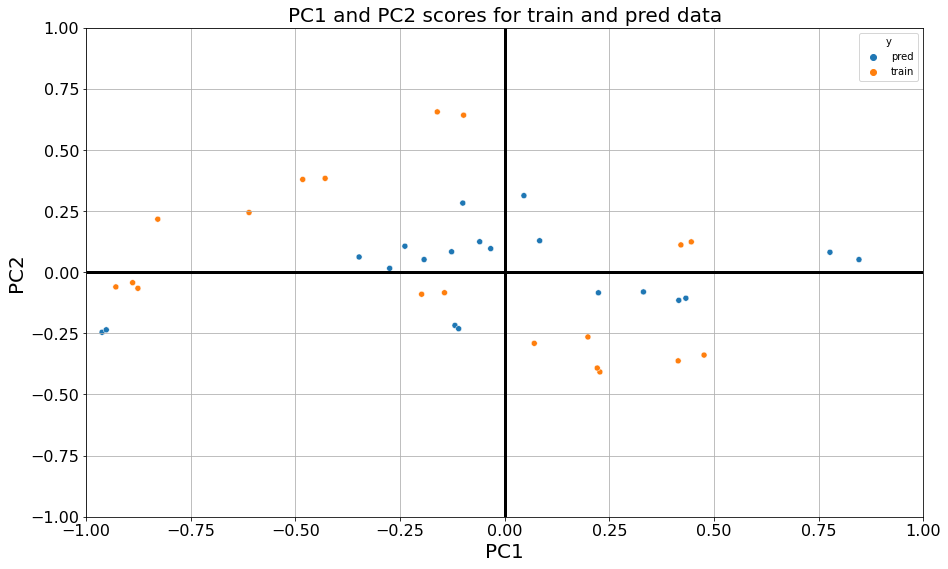

In [27]:
# Plotting the scores in PC1, PC2 of all 54 points in the train and test data set
fig = plt.figure(figsize=(15, 9))
plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1), fontsize=20);
plt.ylabel("PC{}".format(2), fontsize=20);
plt.tick_params(labelsize=16)
plt.title('PC1 and PC2 scores for train and pred data',fontsize=20)
plt.grid()
sns.scatterplot(x='PC1',y='PC2',hue = 'y', data=a3)
plt.savefig('Fig_1_E_Choudhary_Shreyas.png')

Why is it important to overlap the scores of both train and test set in one graph? What are you checking to see?

- The training and test sets should not overlap at any time. The test set is used to determine when to stop training the model. The main idea is to check the model performance and to stop when there seems to be no more improvement. At some point, model could keep improving to improve the performance of training set but if is done, we would get overfitting.
So, if two sets are overlapping, the validation loss function will become similar to the training loss function and the model wil keep training leading to overfitting.

#Task #2

In [28]:
#Scaling the training spectrum data
sawdust_train_spectra_scaled = pd.DataFrame(sawdust_spectra_scaled)
sawdust_train_spectra_scaled.shape

(30, 1201)

In [29]:
#removing the outliers from training and scaled spectrum data
sawdust_train_spectra_scaled = sawdust_train_spectra_scaled.drop(sawdust_train_spectra_scaled.index[18:20])
sawdust_train_spectra_scaled.shape

(28, 1201)

#PLS Regression

-----------For output Birch-------------------------

In [30]:
#Defining the y split for regression (Output- Birch)
y1 = sawdust_train_df['Birch'].drop(train_scores_pd.index[18:20])

In [31]:
#Implementing the PLS Regression model for Birch
pls_sklearn1 = PLSRegression(n_components=3, scale=False)
pls_sklearn1.fit(sawdust_train_spectra_scaled, y1)

PLSRegression(copy=True, max_iter=500, n_components=3, scale=False, tol=1e-06)

In [32]:
#Checking the R2 score of PLS regression for Birch
pls_sklearn1.score(sawdust_train_spectra_scaled,y1)

0.9794651832504429

-----------For output Spruce-------------------------

In [33]:
#Defining the y split for regression (Output- Spruce)
y2 = sawdust_train_df['Spruce'].drop(train_scores_pd.index[18:20])

In [34]:
#Implementing the PLS Regression model for Spruce
pls_sklearn2 = PLSRegression(n_components=3, scale=False)
pls_sklearn2.fit(sawdust_train_spectra_scaled, y2)

PLSRegression(copy=True, max_iter=500, n_components=3, scale=False, tol=1e-06)

In [35]:
#Checking the R2 score of PLS regression for Spruce
pls_sklearn2.score(sawdust_train_spectra_scaled, y2)

0.920438653409007

-----------For output Pine-------------------------

In [36]:
#Defining the y split for regression (Output- Pine)
y3 = sawdust_train_df['Pine'].drop(train_scores_pd.index[18:20])

In [37]:
#Implementing the PLS Regression model for Pine
pls_sklearn3 = PLSRegression(n_components=4, scale=False)
pls_sklearn3.fit(sawdust_train_spectra_scaled, y3)

PLSRegression(copy=True, max_iter=500, n_components=4, scale=False, tol=1e-06)

In [38]:
#Implementing the PLS Regression model for Pine
pls_sklearn3.score(sawdust_train_spectra_scaled, y3)

0.9802989754028336

### Comparing the model predictions vs the actual predicted values

In [39]:
#For Spruce
y_test_predicted2 = pls_sklearn2.predict(sawdust_spectra_pred_scaled)

In [40]:
#For Pine
y_test_predicted3 = pls_sklearn3.predict(sawdust_spectra_pred_scaled)

In [41]:
#For Birch
y_test_predicted1 = pls_sklearn1.predict(sawdust_spectra_pred_scaled)

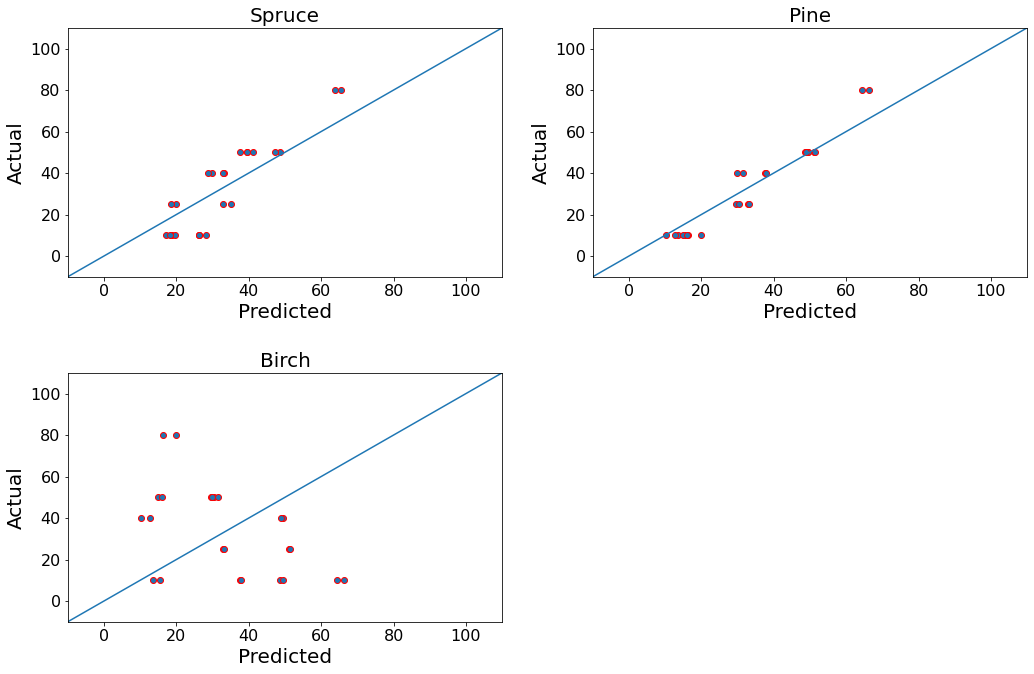

In [42]:
#Plotting the 24 actual vs predicted values in a 1x3 subplot
fig3 = plt.figure(figsize=(15, 10))

sub3 = fig3.add_subplot(2,2,1)
plt.scatter(y_test_predicted2, sawdust_pred_df['Spruce'] , marker="o", edgecolors='r')
plt.plot([-10, 110], [-10, 110])
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)
plt.title('Spruce', fontsize = 20)
plt.tick_params(labelsize=16)
plt.xlim([-10, 110])
plt.ylim([-10, 110])

sub4 = fig3.add_subplot(2,2,2)
plt.scatter(y_test_predicted3, sawdust_pred_df['Pine'], marker="o", edgecolors='r')
plt.plot([-10, 110], [-10, 110])
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)
plt.title('Pine', fontsize = 20)
plt.tick_params(labelsize=16)
plt.xlim([-10, 110])
plt.ylim([-10, 110])

sub5 = fig3.add_subplot(2,2,3)
plt.scatter(y_test_predicted3, sawdust_pred_df['Birch'], marker="o", edgecolors='r')
plt.plot([-10, 110], [-10, 110])
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)
plt.title('Birch', fontsize = 20)
plt.tick_params(labelsize=16)
plt.xlim([-10, 110])
plt.ylim([-10, 110])

fig3.tight_layout(pad=3.0)#For increasing the spacing between subplots
plt.savefig('Fig_2_B_Choudhary_Shreyas.png')